In [413]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [414]:
# purchasing data
data = pd.read_csv('Social_Network_Ads.csv', delimiter = ';')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [415]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

In [416]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [417]:
data.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [418]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LE = LabelEncoder()
data['Gender'] = LE.fit_transform(data['Gender'])

In [419]:
# drop user id column 
data = data.drop('User ID', axis=1)

In [420]:
data_scale = data[['Age', 'EstimatedSalary']]

In [421]:
data_no_scale = data[['Gender', 'Purchased']]

In [422]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_scale = sc.fit_transform(data_scale)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [423]:
data_scale = pd.DataFrame(data_scale)

In [424]:
#concat scaled and not scaled again
data = pd.concat([data_scale, data_no_scale], axis=1)

In [425]:
data.columns = ['Age', 'EstimatedSalary', 'Gender', 'Purchased']

In [426]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(data, data["Gender"]):
    data_train = data.loc[train_index]
    data_test = data.loc[test_index]

In [427]:
X_train_log = data_train[['Age', 'EstimatedSalary', 'Gender']]
y_train_log = data_train['Purchased']
X_test_log = data_test[['Age', 'EstimatedSalary', 'Gender']]
y_test_log = data_test['Purchased']

X_train_knn = data_train[['Age', 'EstimatedSalary', 'Gender']]
y_train_knn = data_train['Purchased']
X_test_knn = data_test[['Age', 'EstimatedSalary', 'Gender']]
y_test_knn = data_test['Purchased']

# Logistic Regression

In [428]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [429]:
model_log = LogisticRegression()

In [430]:
model_log.fit(X_train_log, y_train_log)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [431]:
y_predict_log = model_log.predict(X_train_log)

In [432]:
y_predict_test_log = model_log.predict(X_test_log)

In [433]:
accuracy_train_log = accuracy_score(y_predict_log, y_train_log)
accuracy_train_log

0.821875

In [434]:
accuracy_test_log = accuracy_score(y_predict_test_log, y_test_log)
accuracy_test_log

0.875

# KNN Precision Recall ROC-AUC 

In [435]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [436]:
model_knn = KNeighborsClassifier()

In [437]:
from sklearn.model_selection import cross_val_predict
y_scores_knn = cross_val_predict(model_knn, X_train_knn, y_train_knn, cv=3,
                             method="predict_proba")
#y_scores_knn

In [438]:
y_scores_knn = y_scores_knn[:, 1]

In [439]:
from sklearn.metrics import precision_recall_curve
precisions_knn, recalls_knn, thresholds_knn = precision_recall_curve(y_train_knn, y_scores_knn)

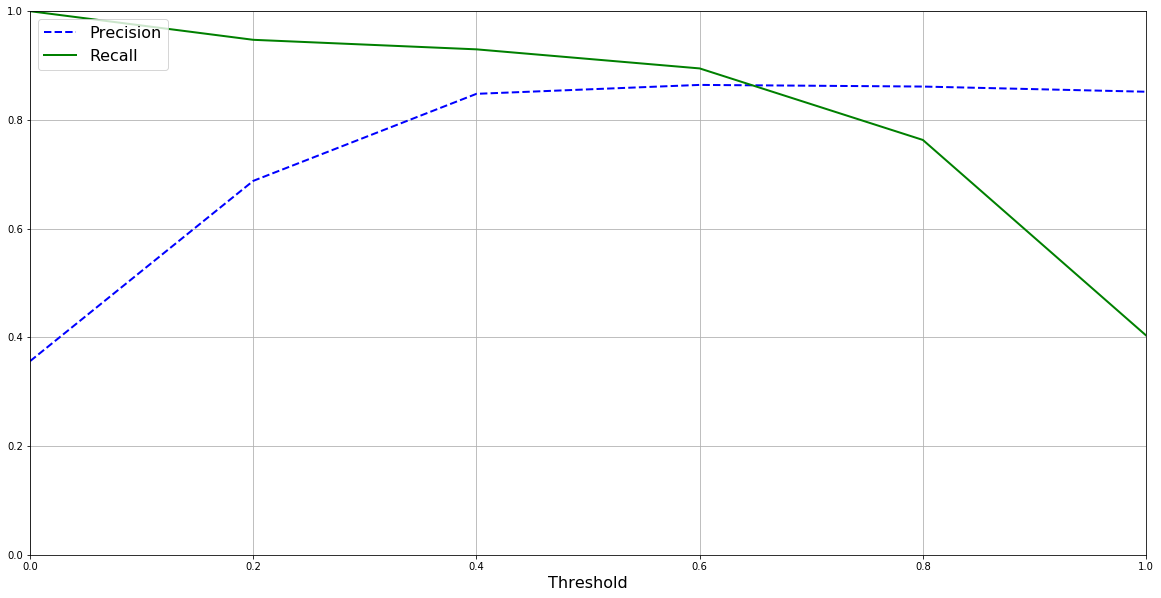

In [440]:
plt.figure(figsize=(20, 10))
plot_precision_recall_vs_threshold(precisions_knn, recalls_knn, thresholds_knn)
plt.xlim([0, 1])
plt.grid()
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

# Confusion matrix, Presision, Recall and F1score

In [441]:
from sklearn.metrics import confusion_matrix
conf_train_log = confusion_matrix(y_train_log, y_predict_log)
conf_train_log

array([[194,  12],
       [ 45,  69]], dtype=int64)

In [442]:
conf_test_log = confusion_matrix(y_test_log, y_predict_test_log)
conf_test_log

array([[47,  4],
       [ 6, 23]], dtype=int64)

In [443]:
from sklearn.metrics import precision_score, recall_score
precision_train_log = precision_score(y_train_log, y_predict_log)
precision_train_log

0.8518518518518519

In [444]:
precision_test_log = precision_score(y_test_log, y_predict_test_log)
precision_test_log

0.8518518518518519

In [445]:
recall_train_log = recall_score(y_train_log, y_predict_log)
recall_train_log

0.6052631578947368

In [446]:
recall_test_log = recall_score(y_test_log, y_predict_test_log)
recall_test_log

0.7931034482758621

In [447]:
from sklearn.metrics import f1_score
f1_score_train_log = f1_score(y_train_log, y_predict_log)
f1_score_train_log

0.7076923076923076

In [448]:
f1_score_test_log = f1_score(y_test_log, y_predict_test_log)
f1_score_test_log

0.8214285714285715

In [449]:
from sklearn.model_selection import cross_val_predict
y_scores_log = cross_val_predict(model_log, X_train_log, y_train_log, cv=3,
                             method="predict_proba")
y_scores_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.92976224, 0.07023776],
       [0.58816429, 0.41183571],
       [0.80984773, 0.19015227],
       [0.72512721, 0.27487279],
       [0.36024634, 0.63975366],
       [0.65769039, 0.34230961],
       [0.63386049, 0.36613951],
       [0.4279596 , 0.5720404 ],
       [0.7004601 , 0.2995399 ],
       [0.67319761, 0.32680239],
       [0.87491681, 0.12508319],
       [0.48636861, 0.51363139],
       [0.66393608, 0.33606392],
       [0.69710242, 0.30289758],
       [0.66271759, 0.33728241],
       [0.28212478, 0.71787522],
       [0.92536763, 0.07463237],
       [0.21654782, 0.78345218],
       [0.66068375, 0.33931625],
       [0.56713127, 0.43286873],
       [0.27337858, 0.72662142],
       [0.89435063, 0.10564937],
       [0.61267412, 0.38732588],
       [0.66918736, 0.33081264],
       [0.38387445, 0.61612555],
       [0.8442398 , 0.1557602 ],
       [0.9378061 , 0.0621939 ],
       [0.33971458, 0.66028542],
       [0.64132851, 0.35867149],
       [0.61367943, 0.38632057],
       [0.

In [450]:
y_scores_log = y_scores_log[:, 1]

In [451]:
from sklearn.metrics import precision_recall_curve
precisions_log, recalls_log, thresholds_log = precision_recall_curve(y_train_log, y_scores_log)

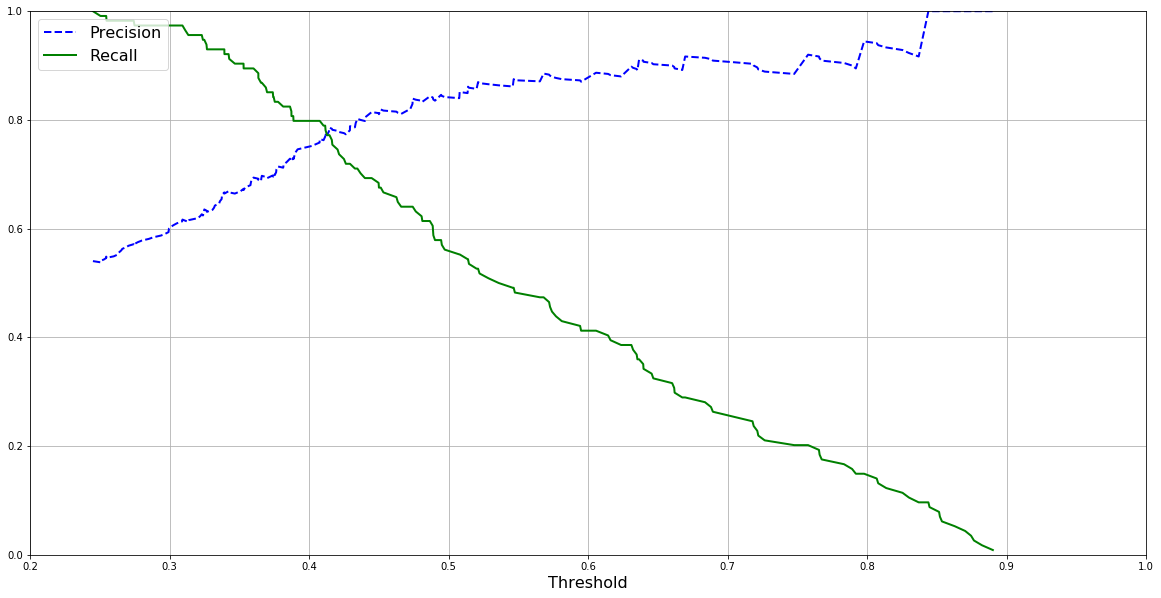

In [452]:
plt.figure(figsize=(20, 10))
plot_precision_recall_vs_threshold(precisions_log, recalls_log, thresholds_log)
plt.xlim([0.2, 1])
plt.grid()
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

# ROC-AUC 

In [453]:
from sklearn.metrics import roc_auc_score

In [454]:
roc_auc_score(y_train_knn, y_scores_knn)

0.9249276102878555

In [455]:
roc_auc_score(y_train_log, y_scores_log)

0.9140265712825754

In [456]:
from sklearn.metrics import roc_curve

In [457]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_knn, y_scores_knn)

In [458]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_train_log, y_scores_log)

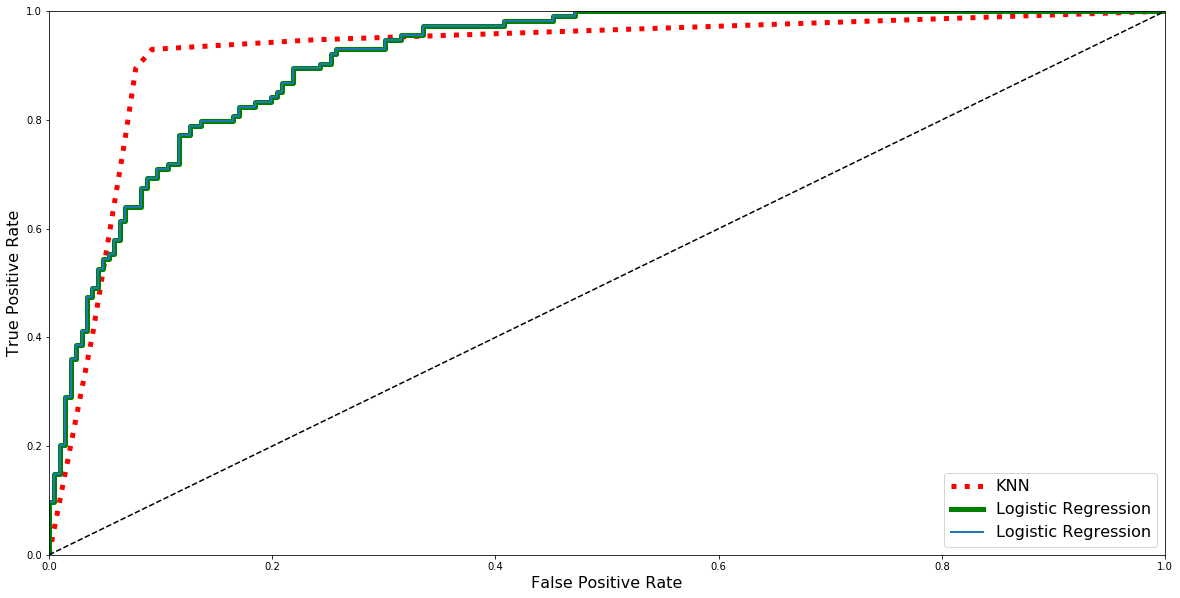

In [459]:
plt.figure(figsize=(20, 10))
plt.plot(fpr_knn, tpr_knn, "r:", linewidth=5, label="KNN")
plt.plot(fpr_log, tpr_log, "g", linewidth=5, label="Logistic Regression")
plot_roc_curve(fpr_log, tpr_log, "Logistic Regression")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()